### Image Stiching

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

#for single image
def imshow(title,image,size=3):
    w,h = image.shape[1],image.shape[0]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.title(title)
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.show()

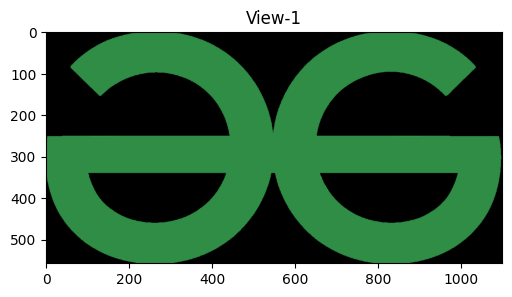

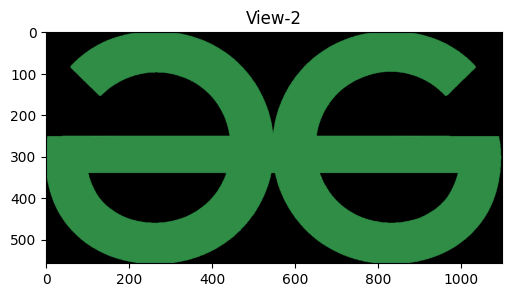

In [32]:
img1 = cv.imread(os.path.join('..','data','gfgleft.png'))
img2 = cv.imread(os.path.join('..','data','gfgright.png'))
imshow('View-1',img1)
imshow('View-2',img2)


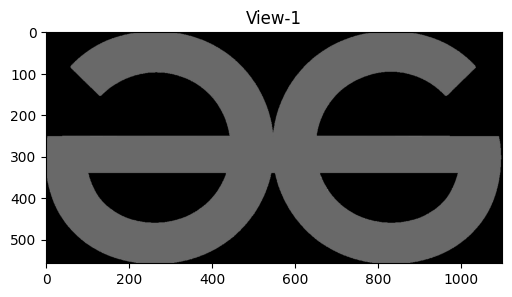

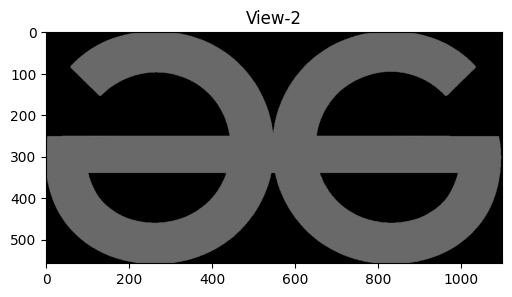

In [33]:
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
imshow('View-1',gray1)
imshow('View-2',gray2)

In [34]:
# Creating a feature detector and descriptor using orb
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(img2,None)

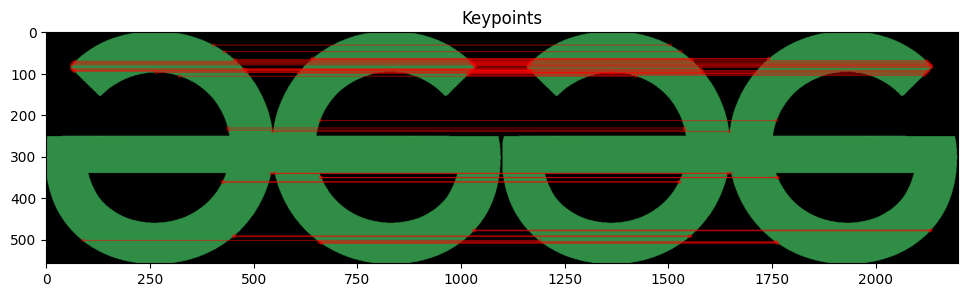

In [35]:
#matching the descriptors
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
sorted_matches = sorted(matches,key=lambda x:x.distance)
matched_image = cv.drawMatches(img1.copy(),kp1,img2.copy(),kp2,sorted_matches[:50],None,(0,0,255),flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow('Keypoints',matched_image)

In [36]:
#Extracting keypoints and creating Homography
src_points = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
dst_points = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
H,_ = cv.findHomography(src_points,dst_points,cv.RANSAC,5.0)

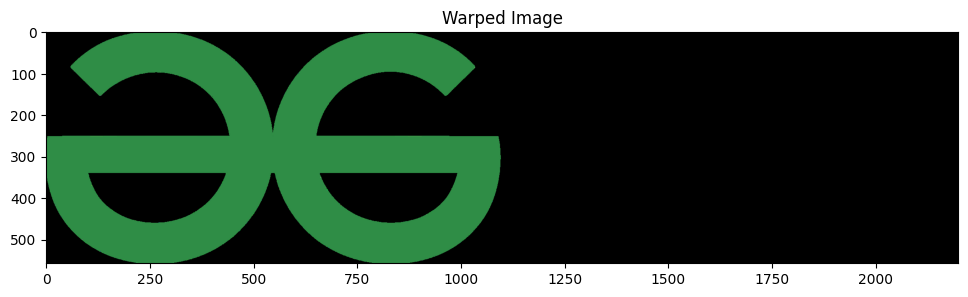

In [37]:
# Get the dimensions of the images
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# Get the canvas dimesions
pts = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
img2_warped = cv.warpPerspective(img2, H, (w1 + w2, h1))

# Place the first image on the canvas
img2_warped[0:h1, 0:w1] = img1
imshow('Warped Image',img2_warped)
